In [120]:
import numpy as np
import pandas as pd

In [121]:
df=pd.read_csv('Housing.csv')

In [122]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [123]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [124]:
x=df['area']
y=df['price']

In [125]:
x_mean=x.mean()

In [126]:
sum2=0
for i in x:
    sum2+=(i-x_mean)**2

sum2

2561974559.3211007

In [127]:
sum1 = 0
mean_x = x.mean()
mean_y = y.mean()
for i, j in zip(x, y):
    sum1 += (i - mean_x) * (j - mean_y)

In [128]:
slope=sum1/sum2

In [129]:
slope

461.9748942727828

In [130]:
sum_x=0
n=0
for i in x:
    sum_x+=i
    n+=1

avg_x=sum_x/n

In [131]:
sum_y=0
n=0
for i in y:
    sum_y+=i
    n+=1

avg_y=sum_y/n

In [132]:
intercept=avg_y - slope*avg_x

In [133]:
intercept

2387308.482396433

In [134]:
def linear_line(ip):
    y_pred=slope*ip + intercept
    return y_pred

In [135]:
y_pred=[]
for i in x:
    y_pred.append(linear_line(i))

In [136]:
sol=linear_line(3000)
sol

3773233.1652147816

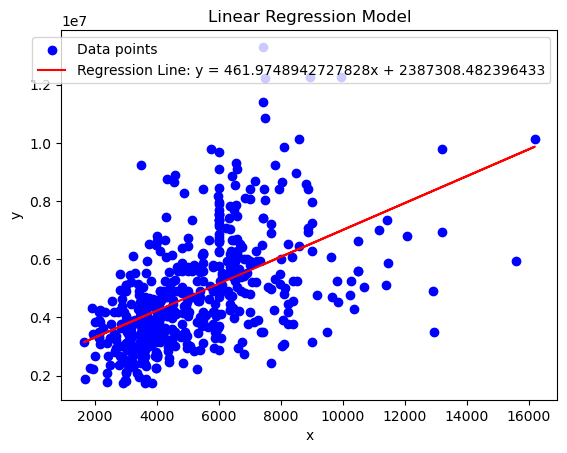

In [137]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Data points')  
plt.plot(x, y_pred, color='red', label=f'Regression Line: y = {slope}x + {intercept}') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Model')
plt.show()


In [138]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [139]:
x = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'price'])

In [140]:
y = df['price']

In [141]:
x.head()

area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2

In [142]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.5464062355495873
Mean Squared Error: 2292721545725.3613


In [150]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_log = np.log(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0893066652001824
R-squared: 0.5374838091347731
